In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
uber_data=pd.merge(ride_data,city_data, on='city',how='left')
# Display the data table for preview
uber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

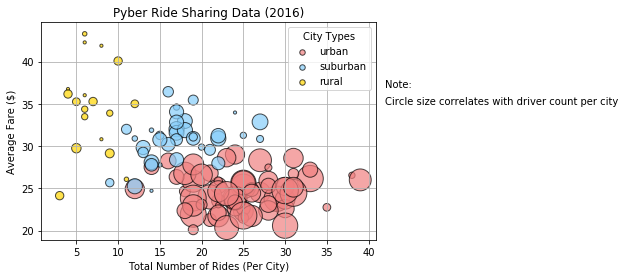

In [9]:
# Obtain the x and y coordinates for each of the three city types
urban=uber_data.loc[uber_data['type']=='Urban']
suburban=uber_data.loc[uber_data['type']=='Suburban']
rural = uber_data.loc[uber_data['type']=='Rural']

#creating the urban values
ucity_group=urban.groupby('city')
ucity_rides=ucity_group['ride_id'].count()
ucity_fare=ucity_group['fare'].mean()
ucity_drivers=ucity_group['driver_count'].first()

#creating the suburban values
scity_group=suburban.groupby('city')
scity_rides=scity_group['ride_id'].count()
scity_fare=scity_group['fare'].mean()
scity_drivers=scity_group['driver_count'].first()

#ceating the rural values
rcity_group=rural.groupby('city')
rcity_rides=rcity_group['ride_id'].count()
rcity_fare=rcity_group['fare'].mean()
rcity_drivers=rcity_group['driver_count'].first()

# Build the scatter plots for each city types
plt.scatter(ucity_rides,ucity_fare,s=ucity_drivers*10,c='lightcoral',alpha=0.7,edgecolors='black')
plt.scatter(scity_rides,scity_fare,s=scity_drivers*10,c='lightskyblue',alpha=0.7,edgecolors='black')
plt.scatter(rcity_rides,rcity_fare,s=rcity_drivers*10,c='gold',alpha=0.7,edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
lgnd=plt.legend(['urban','suburban','rural'],title='City Types')

#fixing size of legend
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,37,'Note:')
plt.text(42,35,'Circle size correlates with driver count per city')
# Save Figure
plt.savefig('Pyberdata.jpg')

# Show plot
plt.show()

## Total Fares by City Type

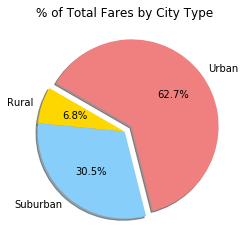

In [3]:
# Calculate Type Percents
type_group=uber_data.groupby('type')
type_total=type_group['fare'].sum()
type_percent=type_total/sum(type_total)

# Build Pie Chart
plt.pie(type_percent,labels=['Rural','Suburban','Urban'],explode=[0,0,0.1],colors=['gold','lightskyblue','lightcoral'],startangle=150,shadow=4,autopct='%1.1f%%')
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig('farespie.jpg')

# Show Figure
plt.show()

## Total Rides by City Type

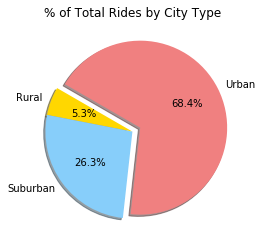

In [4]:
# Calculate Ride Percents
ride_total=type_group['ride_id'].count()
ride_percent=ride_total/sum(ride_total)

# Build Pie Chart
plt.pie(ride_percent,labels=['Rural','Suburban','Urban'],explode=[0,0,0.1],colors=['gold','lightskyblue','lightcoral'],startangle=150,shadow=4,autopct='%1.1f%%')
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig('ridespie.jpg')
# Show Figure
plt.show()

## Total Drivers by City Type

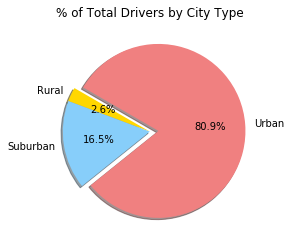

In [5]:
# Calculate Driver Percents
city_group=city_data.groupby('type')
driver_total=city_group['driver_count'].sum()
driver_percent=driver_total/sum(driver_total)

# Build Pie Charts
plt.pie(driver_percent,labels=['Rural','Suburban','Urban'],explode=[0,0,0.1],colors=['gold','lightskyblue','lightcoral'],startangle=150,shadow=4,autopct='%1.1f%%')
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig('driverspie.jpg')

# Show Figure
plt.show()